In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import pickle

with open('x_train_gray_norm.pkl', 'rb') as f:
    x_train_gray_norm = pickle.load(f)

with open('x_test_gray_norm.pkl', 'rb') as f:
    x_test_gray_norm = pickle.load(f)

with open('x_validation_gray_norm.pkl', 'rb') as f:
    x_validation_gray_norm = pickle.load(f)

with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('y_validation.pkl', 'rb') as f:
    y_validation = pickle.load(f)

with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

print("x_train_gray_norm shape:", x_train_gray_norm.shape)
print("x_test_gray_norm shape:", x_test_gray_norm.shape)
print("x_validation_gray_norm shape:", x_validation_gray_norm.shape)
print("y_train shape:", y_train.shape)
print("y_validation shape:", y_validation.shape)
print("y_test shape:", y_test.shape)

x_train_gray_norm shape: (34799, 32, 32, 1)
x_test_gray_norm shape: (12630, 32, 32, 1)
x_validation_gray_norm shape: (4410, 32, 32, 1)
y_train shape: (34799,)
y_validation shape: (4410,)
y_test shape: (12630,)


In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [22]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(AveragePooling2D(pool_size=(2, 2)))  
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))  
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=43, activation='softmax'))


/Users/parthabhang/Desktop/DL/traffic sign classification/signenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

In [24]:
history = model.fit(x_train_gray_norm,y_train,batch_size=500,epochs=50,verbose=1,validation_data = (x_validation_gray_norm,y_validation))

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.0500 - loss: 3.5890 - val_accuracy: 0.0551 - val_loss: 3.5545
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.0554 - loss: 3.4808 - val_accuracy: 0.0624 - val_loss: 3.5508
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.0579 - loss: 3.4808 - val_accuracy: 0.0565 - val_loss: 3.5600
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.0589 - loss: 3.4834 - val_accuracy: 0.0549 - val_loss: 3.5535
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.0576 - loss: 3.4768 - val_accuracy: 0.0565 - val_loss: 3.5513
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.0554 - loss: 3.4822 - val_accuracy: 0.0537 - val_loss: 3.5547
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.0584 - loss: 3.4720 - val_accuracy: 0.0644 - val_loss: 3.5496
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.0612 - loss: 3.4659 - val_accuracy: 0.0501 - v

In [25]:
model.save('model.keras')

In [26]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

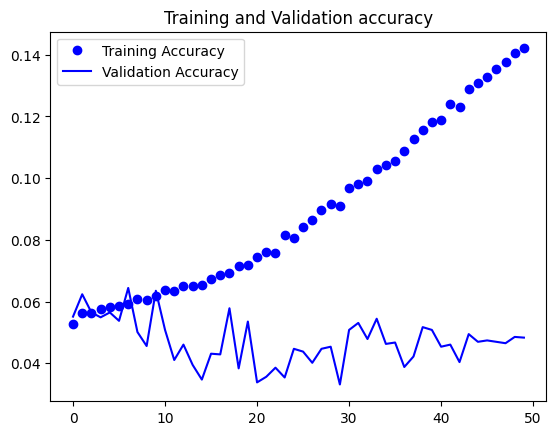

In [27]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()